# Introduction to Simple Linear Regression using method of Least Squares

© Explore Data Science Academy

## Learning Objectives
In this train you will learn how to:

- Gain a basic understanding of linear regression;
- Use least squares to fit a line to existing data; and
- Implement a linear regression model using `sklearn`.

## Outline
This train is structured as follows:

- Dataset import and plotting techniques;
- Walkthrough of regression;
- Finding line of best fit;
- Fitting line using least squares.

## Introduction

In this train, you will learn how to fit a regression line to some data. Recall that a straight line can be described using the following equation:   

$$ y = a + bx$$   
where $a$ is the intercept of the line with the y-axis, and $b$ is the gradient. Using the equation above, it would be possible to predict a value for y, for any given value of x. In this train you will learn how to fit a line to some data for the purpose of predicting values of y from values of x.     

## Importing data and plotting
First, we will import the Python libraries which we will need to work with.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc

**Next** we will load our data as a Pandas DataFrame.

In [2]:
df = pd.read_csv('https://github.com/Explore-AI/Public-Data/blob/master/exports%20ZAR-USD-data.csv?raw=true', index_col=0)

In [5]:
# View the first 10 rows of the DataFrame
df.head(10)

,ZAR/USD,Value of Exports (ZAR)
2008M01,7.01,39356.82
2008M02,7.66,46946.33
2008M03,7.97,51150.89
2008M04,7.79,56174.34
2008M05,7.62,56240.45
2008M06,7.92,60159.93
2008M07,7.63,61268.16
2008M08,7.66,60390.94
2008M09,8.06,61067.34
2008M10,9.74,65652.57


So it looks like we have some monthly data for both the Rand:Dollar exchange rate, and the value of South African exports.   

In this case, we will choose the Rand/Dollar exchange rate as our dependent variable and the monthly value of exports (in Rands) as our independent variable - i.e. we are going to use exports as a predictor for currency value.

For ease of future reference, let's change our column names to reflect the notation which we'll be following going forward:

In [6]:
df.columns = ['Y', 'X']
df.head()

,Y,X
2008M01,7.01,39356.82
2008M02,7.66,46946.33
2008M03,7.97,51150.89
2008M04,7.79,56174.34
2008M05,7.62,56240.45


**Let's create a few plots of the data** using the matplotlib libarary.

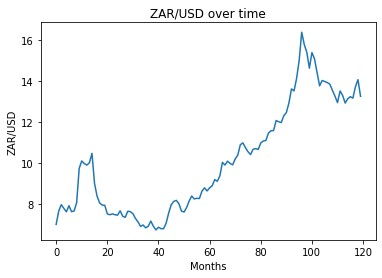

In [7]:
# ZAR/USD over time
plt.plot(np.arange(len(df.Y)), df.Y)
plt.title("ZAR/USD over time")
plt.xlabel("Months")
plt.ylabel("ZAR/USD")
plt.show()

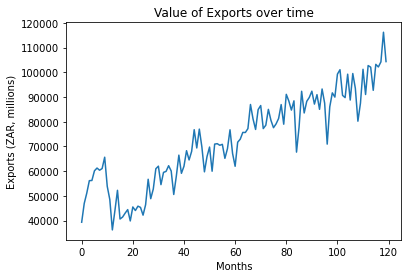

In [8]:
# Value of Exports over time
plt.plot(np.arange(len(df.X)), df.X)
plt.title("Value of Exports over time")
plt.xlabel("Months")
plt.ylabel("Exports (ZAR, millions)")
plt.show()

## Advanced plotting
Let's try and create something a little more visually appealing than the two plots above.

- We'll plot both dependent data series on the same graph;
- We'll assign two separate y-axes: one for each series;
- We'll display a legend near the top of the plot.

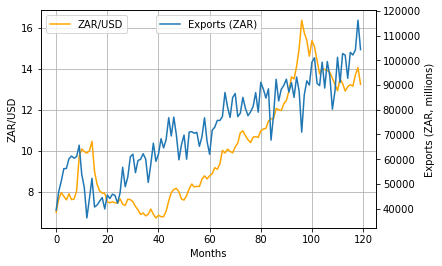

In [9]:
rc('mathtext', default='regular')
# Create blank figure
fig = plt.figure()

# Split figure to allow two sets of y axes
ax = fig.add_subplot(111)

# Plot the first line on its axis
ax.plot(np.arange(len(df.Y)), df.Y, '-', label = 'ZAR/USD', color='orange')

# Create second y axis and plot second line
ax2 = ax.twinx()
ax2.plot(np.arange(len(df.X)), df.X, '-', label = 'Exports (ZAR)')

# Add legends for each axis
ax.legend(loc=2)
ax2.legend(loc=9)

ax.grid()

# Set labels of axes
ax.set_xlabel("Months")
ax.set_ylabel("ZAR/USD")
ax2.set_ylabel("Exports (ZAR, millions)")
plt.show()

# Let's get started with regression
So the plots above - although they are easy to interpret - show too many variables. We have our Y, our X, and time (months), but we're just trying to model ZAR/USD as a *function* of Exports.   

It's important to note here that we are **not** trying to model the exchange rate as a function of time - that's a whole other [interesting field](https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/) but is not within the scope of this train. 
   
Let's try and show the relationship between the two variables using a scatter plot.

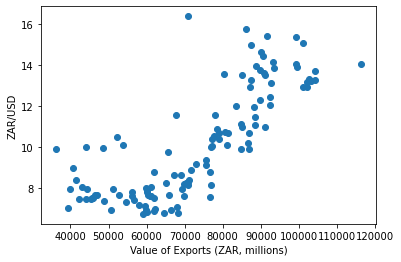

In [10]:
plt.scatter(df['X'], df['Y'])
plt.ylabel("ZAR/USD")
plt.xlabel("Value of Exports (ZAR, millions)")
plt.show()

From the plot above, we can see that there possibly exists a linear relationship between the two variables: **Value of Exports** and **ZAR/USD**.

We would like to be able to fit a line to this data such that we can make predictions of Y for new values of X. We would like to calculate values for $a$ and $b$ such that the line represented by $y = a + bx$ lies as close as possible to the points shown in the scatter plot above.

## Finding the Best Fit Line
Let's say we have estimated some values for $a$ and $b$. We could plug in all of our values of X to find the corresponding values of Y. These *new* values of Y could be compared to the *actual* values of Y to assess the fit of the line. This becomes tedious as the number of data points increases.
   
Looking at the data, we can make a guess at the values of the slope and intercept of the line. We'll use a rough estimate of the slope as $\frac{rise}{run} = \frac{16}{80000} = 0.0002$. For the intercept, we'll just take a guess and call it $-3$.   
   
Let's plot a line with values of $a = -3$, and $b = 0.0002$:   
   
First, we will need to generate some values of y using the following formula:
   
$$\hat{y}_i = a + bx_i$$   
   

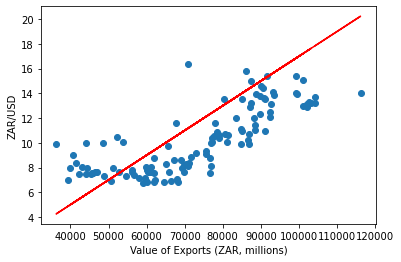

In [13]:
# Define a function to generate values of y from a list of x, 
# Given parameters a and b

def gen_y(x_list, a, b):
    y_gen = []
    for x_i in x_list:
        y_i = a + b*x_i
        y_gen.append(y_i)
    
    return(y_gen)

# Generate the values by invoking the 'gen_y' function
y_gen = gen_y(df.X, -3, 0.0002)

# Plot the results
plt.scatter(df.X, df.Y)  # Plot the original data
plt.plot(df.X, y_gen, color='red')  # Plot the line connecting the generated y-values
plt.ylabel("ZAR/USD")
plt.xlabel("Value of Exports (ZAR, millions)")
plt.show()

At first glance, it looks like the fit of this line is not too bad!   
   
**Let's check the calculted fit of the line** by measuring how far the true y-values of each point are from their corresponding y-value on the line.   
   
We'll use the equation below to calculate the error of each generated value of y:   
   
$$e_i = y_i - \hat{y}_i$$   
   

In [16]:
errors = np.array(df.Y - y_gen)
np.round(errors, 2)

array([ 2.14,  1.27,  0.74, -0.44, -0.63, -1.11, -1.62, -1.42, -1.15,
       -0.39,  2.32,  3.26,  5.65,  4.2 ,  3.02,  3.87,  3.09,  2.44,
        2.06,  2.96,  1.41,  1.66,  1.35,  1.41,  2.02,  1.38, -0.94,
        0.57,  0.09, -1.57, -1.88, -0.61, -1.77, -2.07, -2.46, -2.18,
       -0.2 , -1.42, -3.38, -2.09, -2.53, -3.86, -3.11, -3.54, -4.79,
       -2.91, -4.27, -2.78, -0.94, -2.52, -3.34, -1.17, -3.04, -2.84,
       -2.85, -2.89, -1.77, -2.19, -3.56, -1.8 , -0.61, -2.46, -2.4 ,
       -3.03, -2.76, -2.41, -4.49, -3.14, -2.4 , -4.07, -4.11, -2.06,
       -1.83, -3.02, -2.36, -1.97, -2.41, -2.59, -3.69, -2.14, -4.23,
       -3.6 , -2.84, -3.23,  1.03, -0.99, -3.39, -1.7 , -2.68, -2.67,
       -3.01, -1.51, -1.58, -0.49, -1.53,  0.49,  5.18,  1.57,  0.06,
       -0.37, -1.47, -2.13, -0.72, -1.19, -2.83, -0.78, -2.98, -1.86,
        0.5 , -1.24, -4.3 , -1.69, -4.25, -4.49, -2.41, -4.41, -4.27,
       -4.13, -6.18, -4.61])

When looking at the errors, we see that some of our predictions are off by almost R7!

Let's take a look at a distribution of our errors (using a histogram).

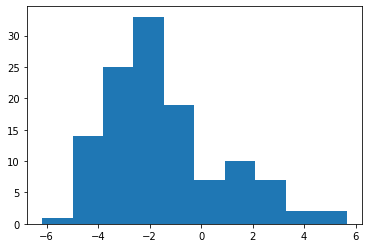

In [19]:
plt.hist(errors)
plt.show()

In addition to having some very large errors, we can also see that most of the errors are positive numbers. Ideally, we want our errors to be evenly distributed either side of zero - we want our line to best fit the data, i.e. no bias.
   
We can measure the overall error of the fit by calculating the **Residual Sum of Squares**:
   
$$RSS = \sum_{i=1}^n(y_i-\hat{y}_i)^2$$

The RSS finds the difference between the y-value of each data point and our estimated line (which may be either negative or positive), squares the difference, and then adds all the differences up. In other words, it's the sum of the squares of all the errors we calculated before.

In [20]:
print("Residual sum of squares:", (errors ** 2).sum())

Residual sum of squares: 867.1710481532764


## Least Squares Method
Least Squares is another method that allows us to find the line of best fit while enforcing the constraint of minimising the residuals. More specifically, the **Least Squares Criterion** states that the sum of the squares of the residuals should be minimized, i.e.   
$$Q = \sum_{i=1}^n(y_i-\hat{y}_i)^2$$

The formulae for the intercept, $a$, and the slope, $b$, are determined by minimizing the equation for the sum of the squared prediction errors:   
$$Q = \sum_{i=1}^n(y_i-(a+bx_i))^2$$

Optimal values for $a$ and $b$ are found by differentiating $Q$ with respect to $a$ and $b$, setting both equal to 0 and then solving for $a$ and $b$.   
   
We won't go into the [derivation process](http://seismo.berkeley.edu/~kirchner/eps_120/Toolkits/Toolkit_10.pdf) here, but the equations for $a$ and $b$ are:   
   
$$b = \frac{\sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^n(x_i-\bar{x})^2}$$   
   
and:   
   
$$a = \bar{y} - b\bar{x}$$

where $\bar{y}$ and $\bar{x}$ are the mean values of $y$ and $x$ in our dataset, respectively.
   
**Let's calculate these values in Python!** We'll call _a_ the intercept and _b_ the slope.

In [13]:
X = df.X.values
Y = df.Y.values

# Calculate x bar, y bar
x_bar = np.mean(X)
y_bar = np.mean(Y)

# Calculate slope
b = sum( (X-x_bar)*(Y-y_bar) ) / sum( (X-x_bar)**2 )

# Calculate intercept
a = y_bar - b*x_bar

print("Slope = " + str(b))
print("Intercept = " + str(a))

Slope = 0.000113507257658843
Intercept = 1.8448114670426463


Now we'll plot the line we've just calculated the coefficients for.

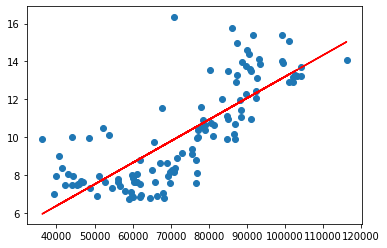

In [14]:
# Use the function we created earlier:
# it generates y-values for given x-values based on parameters a, b
y_gen2 = gen_y(df.X, a, b)

plt.scatter(df.X, df.Y)
plt.plot(df.X, y_gen2, color='red')
plt.show()

In a list called ```errors2```, we'll store the new error values.

In [15]:
errors2 = np.array(y_gen2 - df.Y)
print(np.round(errors2, 2))

[-0.7  -0.49 -0.32  0.43  0.61  0.75  1.17  1.04  0.72 -0.44 -2.14 -2.62
 -3.94 -3.16 -2.69 -2.54 -1.83 -1.32 -1.06 -1.57 -0.51 -0.63 -0.47 -0.49
 -0.82 -0.55  0.87  0.04  0.19  1.14  1.36  0.74  1.47  1.74  1.93  1.82
  0.67  1.25  2.47  1.82  2.01  2.8   2.37  2.5   2.99  1.75  2.46  1.58
  0.62  1.66  2.15  0.82  1.75  1.53  1.59  1.61  0.98  1.06  1.77  0.83
  0.09  1.1   0.93  1.32  1.06  0.58  1.82  0.96  0.59  1.57  1.47  0.23
 -0.12  0.51  0.24  0.1   0.41  0.4   1.01  0.15  1.2   0.8   0.36  0.42
 -2.04 -0.9   0.25 -0.68 -0.11 -0.26 -0.13 -1.19 -1.44 -2.02 -1.69 -3.21
 -6.47 -4.16 -3.14 -2.56 -2.27 -1.77 -2.27 -1.73 -0.91 -2.05 -0.78 -1.38
 -2.59 -1.49  0.39 -1.33  0.21  0.51 -0.76  0.33  0.28 -0.04  0.97  0.44]


Finally, let's plot the errors on a histogram again.

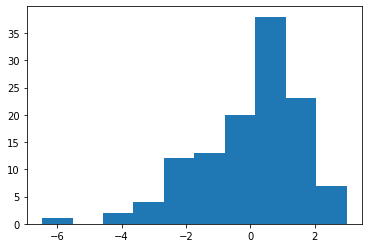

In [16]:
plt.hist(errors2)
plt.show()

In [17]:
print("Residual sum of squares:", (errors2 ** 2).sum())

Residual sum of squares: 321.45716655257655


Here we can see our RSS has improved from ~867 down to ~321.  
Furthermore, if we calculate the sum of the errors we find that the value is close to 0.

In [18]:
# Round off to 11 decimal places
np.round(errors2.sum(),11)

-0.0

----
Intuitively, this should make sense as it is an indication that the sum of the positive errors is equal to the sum of the negative errors. The line fits in the 'middle' of the data.

## Linear Regression in Sklearn
   
Now that you understand how least squares linear regression works, let's implement it using sklearn.   

We'll start by loading the LinearRegression library.

In [25]:
from sklearn.linear_model import LinearRegression

We can take a peak under the hood by using the Python help (`?`) function. This returns the documentation of the required parameters and the attributes of any function or object.   

We're going to need to create a `LinearRegression()` object, so let's first take a look at the documentation for that object:

In [26]:
LinearRegression?

Let's create a `LinearRegression()` object with all the default parameters.

In [27]:
lm = LinearRegression()

At this stage, all we have done is initialise a model of the form: $y = a + bx$ 

But we haven't _fitted the model_ i.e. used the data to calculate the model parameters $a$ and $b$.

### Fitting the linear model

With the object created, we will then need to fit the model to our data. This is done using the `.fit()` function.

In [28]:
lm.fit?

We can see that the `.fit()` function requires two parameters (`X` and `y`), with an optional third parameter, `sample_weight`.   

The `sample_weight` parameter would be useful in situations where the observations in our data have unequal errors - think weight vs height of university students where some students were weighed with an older analogue scale and others were weighed with a new digital scale.   

We have no reason to believe that any of our data is any more, or any less trustworthy so we'll leave out the optional weights parameter.

In [29]:
X = df.X[:,np.newaxis] # convert shape of X from (n,) to (n,1)

<ipython-input-29-12af75401e57>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = df.X[:,np.newaxis] # convert shape of X from (n,) to (n,1)


In [30]:
lm.fit(X, df.Y)

LinearRegression()

If needed, the model parameters found by the `.fit()` function can be obtained as follows: 

In [31]:
a = float(lm.intercept_)

In [32]:
b = lm.coef_

In [33]:
print("Slope:\t\t", b)
print("Intercept:\t", float(a))

Slope:		 [0.00011351]
Intercept:	 1.8448114670426445


### Getting model predictions

To obtain $y$ values from our linear regression model we use the `.predict()` function. Given an array of $x$ values, this function evaluates the fitted model at those $x$ values and returns the corresponding $y$ values. Note that in this case, the `.predict()` function does exactly what the `gen_y()` function we created earlier does. We will explore the concept of prediction in depth in later trains.

In [35]:
# generate values of y from x, using the linear model
gen_y = lm.predict(X)

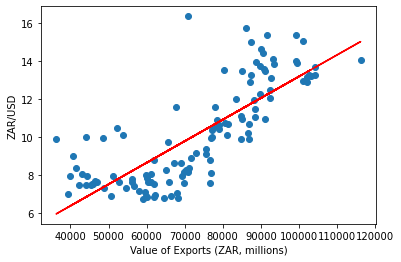

In [36]:
# plot the results
plt.scatter(X, df.Y)  # plot the original data
plt.plot(X, gen_y, color='red')  # plot the line connecting the generated y-values
plt.ylabel("ZAR/USD")
plt.xlabel("Value of Exports (ZAR, millions)")
plt.show()

## Assessing the model accuracy
We can measure the overall error of the fit by calculating the **Residual Sum of Squares**:
   
$$RSS = \sum_{i=1}^n(y_i-\hat{y}_i)^2$$

In [39]:
print("Residual sum of squares:", ((gen_y - df.Y) ** 2).sum())

Residual sum of squares: 321.45716655257655


### Sklearn error metrics
Sklearn also has implementations of common error metrics which will make things easier for us to assess the fit of our model.   

In addition to RSS, there are some other metrics we can use:

**Mean Squared Error:**
$$MSE = \frac{RSS}{n}$$   
$$MSE = \frac{1}{n}\sum_{i=1}^n(y_i-\hat{y}_i)^2$$   
   
**R squared:**
$$R^2 = 1 - \frac{RSS}{TSS}$$   
$$R^2 = 1 - \frac{\sum(y_i-\hat{y}_i)^2}{\sum(y_i-\bar{y})^2}$$

We can compute these metrics using Sklearn as follows:

In [29]:
from sklearn import metrics

In [30]:
print('MSE:', metrics.mean_squared_error(df.Y, gen_y))

MSE: 2.678809721271471


In [31]:
# Multiple MSE by N to get RSS
print("Residual sum of squares:", metrics.mean_squared_error(df.Y, gen_y)*len(X)) 

Residual sum of squares: 321.45716655257655


In [32]:
print('R_squared:', metrics.r2_score(df.Y, gen_y))

R_squared: 0.6158417476896207


## Conclusion

We learnt how to:
* Create line plots of variables over time;
* Create a scatter plot of two continuous variables;   
* Use the method of least squares to fit a regression line to some data;   
* Assess the fit of a regression line using the residual sum of squares; 
* Use scikit-learn to perform ordinary least squares regression.   
* Use scikit-learn to assess model performance using metrics such as $MSE$ and $R^2$.  

In future trains, we will look at methods for improving the predictive accuracy of our model.

## Appendix

Links to additional resources to help with the understanding of concepts presented in the train:

- [Helpful video on the calculations behind the coefficients](https://www.youtube.com/watch?v=9MEmdixNMZI)